In [297]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

2 - Overview of the Problem set Problem Statement: You are given a dataset ("data.h5") containing:

a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
a test set of m_test images labeled as cat or non-cat
each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).
You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [298]:
def load_dataset():
    with h5py.File('F:/chirps/catvnoncat/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('F:/chirps/catvnoncat/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [299]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with trainset_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

y = [1], it's a 'cat' picture.


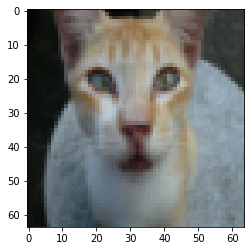

In [300]:
# Example of a picture
index = 11
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [301]:
test_set_x_orig.shape

(50, 64, 64, 3)

In [302]:
nx = train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]
m = train_set_x_orig.shape[0]

In [313]:
train_set_x = train_set_x_orig.reshape(nx,m)
train_set_x = train_set_x / 255
test_set_x = test_set_x_orig.reshape(nx,50)
test_set_x = test_set_x / 255

In [314]:
## Initializing w and b
w = np.zeros(nx)
z = np.zeros(m)
b = 0

In [315]:
print("shape of train_set_x:", train_set_x.shape)
print("shape of w:", w.shape)
print("shape of z:", z.shape)


shape of train_set_x: (12288, 209)
shape of w: (12288,)
shape of z: (209,)


In [316]:
def tanh(z):
    temp = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return temp;

def sigmoid(z):
    temp = 1/(1+np.exp(-z))
    return temp;

J = 0
dw = np.zeros(nx)
db = 0
z = np.dot(w.T,train_set_x)+b
a = 1/(1+np.exp(-z))
J = J + np.sum(-train_set_y*np.log(a) - (1-train_set_y)*np.log(1-a))
dz = a - train_set_y
dw = dw + np.dot(train_set_x, dz.T).T
db = db + dz
J = J/m
dw = dw/m
db = db/m

w = w - 0.15*dw
b = b - 0.15*db

In [317]:
w.shape

(12288,)

In [318]:
train_set_x.shape

(12288, 209)

In [319]:
## Using the gradient descent algo iteration 100 times. and taking learning rate = 0.15
import time
alpha = 0.005

start = time.time()
for i in range(0,2000):
    J = 0
    dw = np.zeros(nx)
    db = 0
    z = np.dot(w,train_set_x)+b
    a = sigmoid(z)
    J = np.sum(-train_set_y*np.log(a) - (1-train_set_y)*np.log(1-a))
    dz = a - train_set_y
    dw = dw + np.dot(train_set_x, dz.T).T
    db = np.sum(dz)
    J = J/m
    dw = dw/m
    db = db/m

    w = w - alpha*dw
    b = b - alpha*db
    
    if(i%100==0):
        print("value of J with",i, " iternation: ", J )
end = time.time()

print("Time taken: " , 1000*(end-start), "ms")

value of J with 0  iternation:  0.6931471805599453
value of J with 100  iternation:  0.7097263623007752
value of J with 200  iternation:  0.6577119065270963
value of J with 300  iternation:  0.6146107943572359
value of J with 400  iternation:  0.5780007284635371
value of J with 500  iternation:  0.5463715182209924
value of J with 600  iternation:  0.5183312353161215
value of J with 700  iternation:  0.4928515102320145
value of J with 800  iternation:  0.46925927021378894
value of J with 900  iternation:  0.44713858237057064
value of J with 1000  iternation:  0.4262622837237729
value of J with 1100  iternation:  0.4066165678579391
value of J with 1200  iternation:  0.38872327164259224
value of J with 1300  iternation:  0.37467754434882167
value of J with 1400  iternation:  0.3658260849763739
value of J with 1500  iternation:  0.35853187114368096
value of J with 1600  iternation:  0.35161190216779875
value of J with 1700  iternation:  0.34501222559297523
value of J with 1800  iternation:

In [320]:
## Defining a prediction fucntion

def predict(w,b,X):
    
    z = np.dot(w,X) + b
    a = sigmoid(z)
    y = 0*(a<=0.5)+1*(a>0.5)
    assert(y.shape == (1, X.shape[1]))
    return y

In [321]:
y_pred = predict(w,b, train_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred - train_set_y)) * 100))


train accuracy: 91.38755980861244 %


In [322]:
y_pred_test = predict(w,b, test_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - test_set_y)) * 100))

train accuracy: 34.0 %
